<a href="https://colab.research.google.com/github/borgesf/nicePythonPlots/blob/main/Figure_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

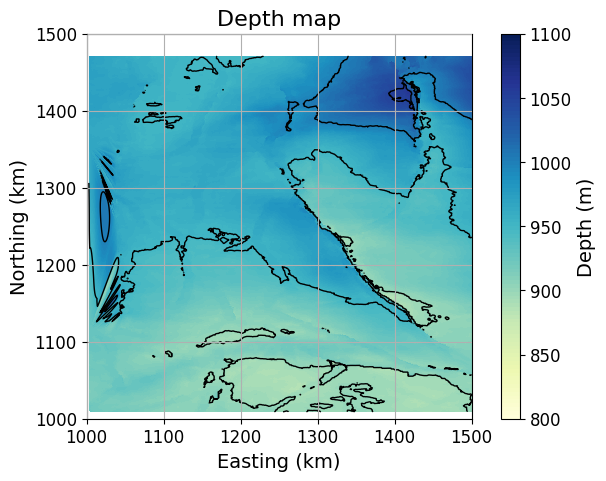

In [ ]:
%matplotlib inline
# This magic command ensures plots appear in the notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import Normalize

# Update global font settings (DejaVu Sans is the default, but we set it explicitly)
plt.rcParams.update({'font.family': 'DejaVu Sans', 'font.size': 12})

# Load data
!wget -q https://raw.githubusercontent.com/agilescientific/notebooks/refs/heads/master/data/Penobscot_HorB.txt
data = np.loadtxt('Penobscot_HorB.txt')
data = np.loadtxt('Penobscot_HorB.txt')
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Create a regular grid
xq = np.linspace(x.min(), x.max(), 1000)  # X grid
yq = np.linspace(y.min(), y.max(), 1000)  # Y grid
Xq, Yq = np.meshgrid(xq, yq)              # Regular grid (mesh)

# Interpolate Z values onto the regular grid (cubic interpolation)
Zq = griddata((x, y), z, (Xq, Yq), method='cubic')

# Create figure
plt.figure(figsize=(7.5, 5))

# Filled contour plot (using pcolormesh to mimic contourf + fixed caxis)
cmap = plt.get_cmap('YlGnBu', 100)        # perceptually uniform map
#cmap = plt.get_cmap('jet_r', 100)        # perceptually uniform map
norm = Normalize(vmin=800, vmax=1100)     # lock colour range 800–1100
pm = plt.pcolormesh(
    Xq, Yq, Zq,
    cmap=cmap,
    norm=norm,
    shading='auto'        # smooth shading, no grid artifacts
)

# Overlay contour lines
contour_levels = np.arange(800, 1201, 50)  # lines every 50 m
plt.contour(
    Xq, Yq, Zq,
    contour_levels,
    colors='k',
    linewidths=1
)

# Customize colormap and colorbar
cbar = plt.colorbar(pm, ticks=np.arange(800, 1101, 50))
cbar.set_label('Depth (m)', fontsize=14)

# Add title and axis labels
plt.title('Depth map', fontsize=16)
plt.xlabel('Easting (km)', fontsize=14)
plt.ylabel('Northing (km)', fontsize=14)

# Adjust axis limits and maintain aspect ratio
plt.xlim([1000, 1500])
plt.ylim([1000, 1500])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

# Add grid and box (grid overlaid on top)
plt.grid(True)
ax.set_axisbelow(False)
for spine in ax.spines.values():
    spine.set_visible(True)

# Show the figure
plt.show()



In [ ]:
# Saving and exporting the file
from google.colab import files

plt.savefig('mapPlot.png', dpi=400)
files.download('mapPlot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>